# T-sne and SOM

In [1]:
import signal_ana as ana
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# Load the signals
seismic = ana.load_signals('data/seismic.h5')

In [3]:
infra = ana.load_signals('data/infrasonic.h5', check_dim = False)

In [4]:
infra.time = infra.time - pd.Timedelta('8 s')
infra = infra.rename(columns = {'lpc_coeff':'lpc_infra', 'amplitude':'amplitude_infra'})

In [5]:
df = pd.merge(seismic, infra, on='time')

In [6]:
# Exclude the eruption days
eruption_days = [ ('2019-07-03', '2019-07-04'), ('2019-08-28', '2019-08-29'), ('2019-08-29', '2019-08-30')]
df = ana.exclude_days(df, eruption_days)

In [7]:
features_wf = ana.get_features(df, 'waveform')
features_lpc = ana.get_features(df, 'lpc_coeff')
features_amp = ana.get_features(df, 'amplitude')

In [8]:
features_lpc_inf = ana.get_features(df, 'lpc_infra')
features_amp_inf = ana.get_features(df, 'amplitude_infra')

## 1. Filtered signal

### t-SNE 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.195s...
[t-SNE] Computed neighbors for 19748 samples in 138.437s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for 

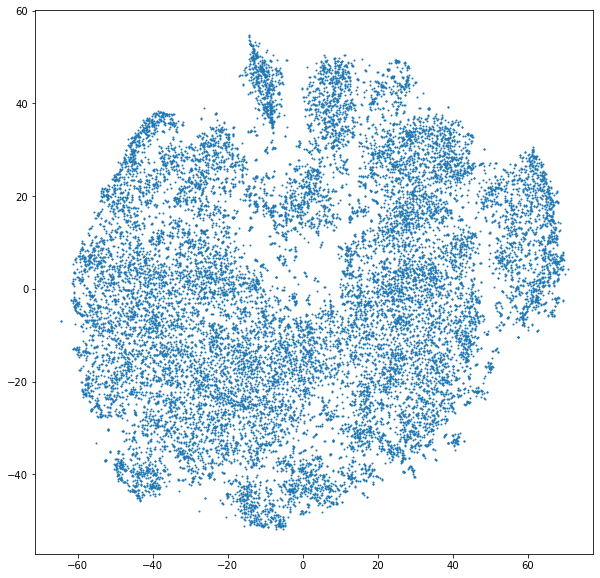

In [7]:
tsne_x, tsne_y = ana.run_tsne(features_wf, perplexity=50)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

In [20]:
tsne_wf = df[['time', 'tsne_x', 'tsne_y']]

In [22]:
tsne_wf.to_hdf('tsne_wf.h5', 'frame')

### SOM 25 x 25

In [14]:
from skopt.space import Real, Categorical, Integer

# Train som
size_x = 25
size_y = 25
niter = 59000 #10000
sigma = 2.2 # #0.3
learning_rate= .013 #.5
pca=False
random_seed = 2

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result = ana.optimize(skopt_dims, init_param, features_wf, size_x, size_y,
                             num_calls=50, pca = pca, random_seed = random_seed)

learning_rate
sigma
niter

 	 ::: 1 SKOPT CALL ::: 

{'learning_rate': 0.5, 'sigma': 0.3, 'niter': 10000}
0.317105777733
0.0280534737695
0.31834426594870724

 	 ::: 5 SKOPT CALL ::: 

{'learning_rate': 0.98923731135154302, 'sigma': 4.2896095739820472, 'niter': 127.67749789698733}
0.266135183335
0.0390925663358
0.2689910120271296

 	 ::: 7 SKOPT CALL ::: 

{'learning_rate': 0.0545179970085223, 'sigma': 1.7723569323567887, 'niter': 258.08790437897505}
0.259114753253
0.979542232125
1.0132341485902991

 	 ::: 8 SKOPT CALL ::: 

{'learning_rate': 0.42247674710376626, 'sigma': 2.6698870195095812, 'niter': 224.95468148958417}
0.47886749149
0.259975693741
0.544886626503703

 	 ::: 9 SKOPT CALL ::: 

{'learning_rate': 0.050005155354368676, 'sigma': 2.7533525737430855, 'niter': 657.5198966719222}
0.38874110592
0.873151711566
0.9557790324348379

 	 ::: 10 SKOPT CALL ::: 

{'learning_rate': 0.035906978398724206, 'sigma': 4.3769968839537423, 'niter': 2819.9650667710825}
0.424905203746
0.01367227060

/eos/user/l/llayer/.local/lib/python3.6/site-packages/minisom.py:410: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


0.262823066266
0.945817297954
0.9816548911256031

 	 ::: 22 SKOPT CALL ::: 

{'learning_rate': 0.053753433160297286, 'sigma': 1.347130849529685, 'niter': 26566.404798471751}
0.251374097974
0.0767672675714
0.26283483502503824

 	 ::: 23 SKOPT CALL ::: 

{'learning_rate': 0.12984214731208127, 'sigma': 3.0190036724977012, 'niter': 69709.396171553555}
0.304959544202
0.0208122341503
0.30566889388728125

 	 ::: 24 SKOPT CALL ::: 

{'learning_rate': 0.010143488561644869, 'sigma': 3.61785831056083, 'niter': 20862.451409239817}
0.35331678253
0.00597528863682
0.35336730591746746

 	 ::: 25 SKOPT CALL ::: 

{'learning_rate': 0.71252783545931231, 'sigma': 2.4985839590287449, 'niter': 49789.673421266009}
0.290579283089
0.0594996961718
0.29660838424616437

 	 ::: 26 SKOPT CALL ::: 

{'learning_rate': 0.22510675323392565, 'sigma': 5.0, 'niter': 100000.0}
0.366842480083
0.00688677334414
0.3669071174573979

 	 ::: 27 SKOPT CALL ::: 

{'learning_rate': 0.26877751937033184, 'sigma': 4.0346388462662572, '

In [17]:
search_result.to_hdf('som_skopt_wf.h5', 'frame')

## 2. LPC and Amplitude

In [ ]:
lpc_amp = np.concatenate((features_lpc, features_amp),axis=1)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.085s...
[t-SNE] Computed neighbors for 19748 samples in 72.605s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for s

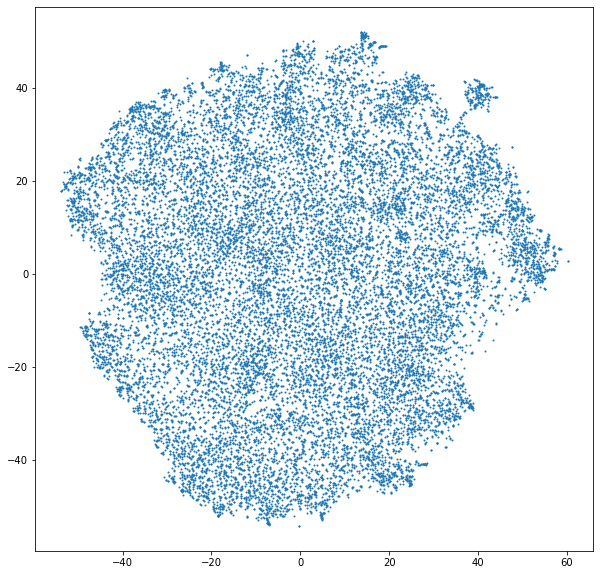

In [23]:
tsne_x, tsne_y = ana.run_tsne(lpc_amp, perplexity=50)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

In [ ]:
from skopt.space import Real, Categorical, Integer

# Train som
size_x = 25
size_y = 25
niter = 59000 #10000
sigma = 2.2 # #0.3
learning_rate= .013 #.5
pca=False
random_seed = 2

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result_lpc = ana.optimize(skopt_dims, init_param, lpc_amp, size_x, size_y,
                             num_calls=50, pca = pca, random_seed = random_seed)

learning_rate
sigma
niter

 	 ::: 1 SKOPT CALL ::: 

{'learning_rate': 0.5, 'sigma': 0.3, 'niter': 10000}
0.0784403856033
0.972807372899
0.9759646913999092

 	 ::: 2 SKOPT CALL ::: 

{'learning_rate': 0.017459338348774098, 'sigma': 0.27391510473816572, 'niter': 287.01860969263373}


/eos/user/l/llayer/.local/lib/python3.6/site-packages/minisom.py:410: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


0.1016928836
0.992860036459
0.9980543545183636

 	 ::: 3 SKOPT CALL ::: 

{'learning_rate': 0.25721236424675092, 'sigma': 1.208886369837024, 'niter': 17789.018687006654}
0.0815690713373
0.150445614746
0.17113560820319343

 	 ::: 4 SKOPT CALL ::: 

{'learning_rate': 0.11468706873200291, 'sigma': 3.6067578197705421, 'niter': 3350.7994970098953}
0.118306748436
0.0117986631558
0.11889362967655628

 	 ::: 5 SKOPT CALL ::: 

{'learning_rate': 0.84867157006299077, 'sigma': 4.6403984791467394, 'niter': 1542.2571648982498}
0.148083449663
0.0422321247721
0.15398785805010595

 	 ::: 6 SKOPT CALL ::: 

{'learning_rate': 0.020239751430618055, 'sigma': 4.8900425283242912, 'niter': 1222.8443455973688}
0.158786556743
0.761191006684
0.7775763108912133

 	 ::: 7 SKOPT CALL ::: 

{'learning_rate': 0.18559545438000255, 'sigma': 3.0854877610026969, 'niter': 1683.5820832440925}
0.126412609599
0.0193437310107
0.12788404042340873

 	 ::: 8 SKOPT CALL ::: 

{'learning_rate': 0.23741311113322774, 'sigma': 4.882

/eos/user/l/llayer/.local/lib/python3.6/site-packages/minisom.py:410: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


0.101498762723
0.992606846263
0.9977827168688982

 	 ::: 14 SKOPT CALL ::: 

{'learning_rate': 0.18245362160379075, 'sigma': 2.7558255786187855, 'niter': 15288.961765859165}
0.10016745069
0.0273951792587
0.10384610741064959

 	 ::: 15 SKOPT CALL ::: 

{'learning_rate': 0.12095637696828263, 'sigma': 5.0, 'niter': 100000.0}


In [ ]:
search_result.to_hdf('som_skopt_lpcamp.h5', 'frame')

## 3. Combination

In [ ]:
full = np.concatenate((features_wf, features_lpc, features_amp),axis=1)

In [ ]:
tsne_x, tsne_y = ana.run_tsne(full, perplexity=50)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

In [ ]:
from skopt.space import Real, Categorical, Integer

# Train som
size_x = 25
size_y = 25
niter = 59000 #10000
sigma = 2.2 # #0.3
learning_rate= .013 #.5
pca=False
random_seed = 2

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result_full = ana.optimize(skopt_dims, init_param, full, size_x, size_y,
                             num_calls=50, pca = pca, random_seed = random_seed)

In [ ]:
search_result.to_hdf('som_skopt_full.h5', 'frame')

## 4. Dense autoencoder

In [4]:
def tsne_dense(dim):
    dense = pd.read_hdf('data/dense_' + str(dim) + '.h5')
    feat = dense.drop(['time'], axis=1).values
    tsne_x, tsne_y = ana.run_tsne(feat, perplexity=50)
    dense['tsne_x'], dense['tsne_y'] = tsne_x, tsne_y
    dense.to_hdf('data/tsne_dense' + str(dim) + '.h5', 'frame')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.262s...
[t-SNE] Computed neighbors for 19748 samples in 285.272s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for 

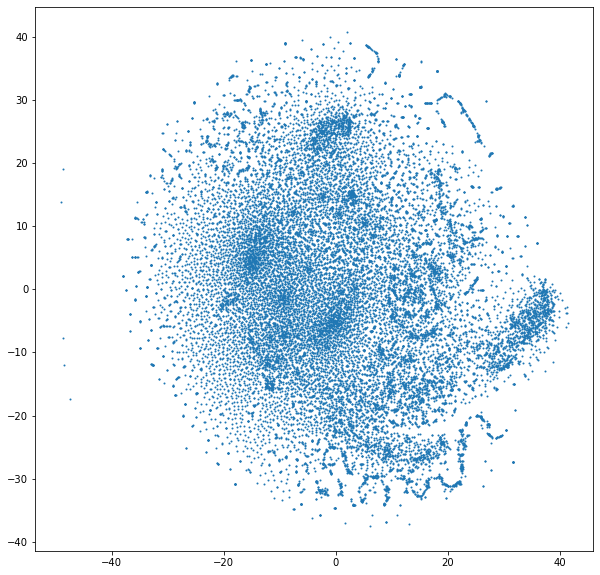

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  f(store)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['time']]

  return pytables.to_hdf(path_or_buf, key, self, **kw

In [5]:
tsne_dense(200)

## 5. LSTM autoencoder

In [36]:
def tsne_lstm(dim):
    lstm = pd.read_hdf('data/lstm_' + str(dim) + '.h5')
    feat = lstm.drop(['time'], axis=1).values
    tsne_x, tsne_y = ana.run_tsne(feat, perplexity=50)
    lstm['tsne_x'], lstm['tsne_y'] = tsne_x, tsne_y
    lstm.to_hdf('data/tsne_lstm' + str(dim) + '.h5', 'frame')

In [33]:
dims = [8, 10, 12, 15]
dims = [d * 31 for d in dims]

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 19748 samples in 0.808s...
[t-SNE] Computed neighbors for 19748 samples in 342.898s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19748
[t-SNE] Computed conditional probabilities for sample 2000 / 19748
[t-SNE] Computed conditional probabilities for sample 3000 / 19748
[t-SNE] Computed conditional probabilities for sample 4000 / 19748
[t-SNE] Computed conditional probabilities for sample 5000 / 19748
[t-SNE] Computed conditional probabilities for sample 6000 / 19748
[t-SNE] Computed conditional probabilities for sample 7000 / 19748
[t-SNE] Computed conditional probabilities for sample 8000 / 19748
[t-SNE] Computed conditional probabilities for sample 9000 / 19748
[t-SNE] Computed conditional probabilities for sample 10000 / 19748
[t-SNE] Computed conditional probabilities for sample 11000 / 19748
[t-SNE] Computed conditional probabilities for sample 12000 / 19748
[t-SNE] Computed conditional probabilities for 

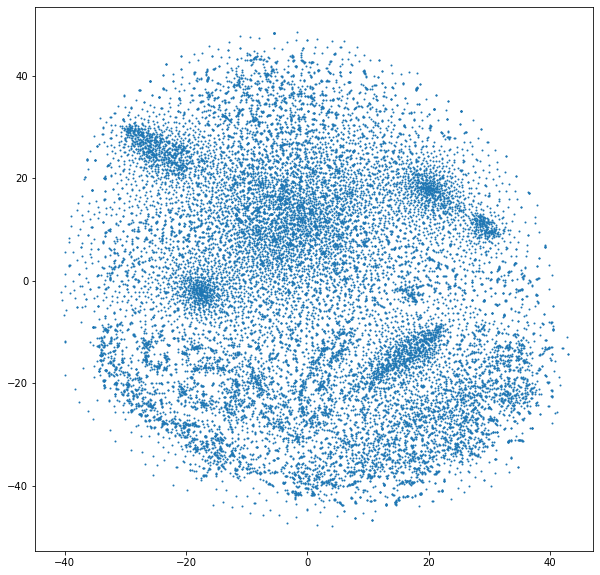

/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/io/pytables.py:274: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_items] [items->None]

  f(store)
/cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['time']]

  return pytables.to_hdf(path_or_buf, key, self, **kw

In [43]:
tsne_lstm(dims[3])

## 6. Add infrasonic signal

In [9]:
seismic_infra = np.concatenate((features_wf, features_lpc, features_amp, features_lpc_inf, features_amp_inf),axis=1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19562 samples in 1.153s...
[t-SNE] Computed neighbors for 19562 samples in 481.459s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19562
[t-SNE] Computed conditional probabilities for sample 2000 / 19562
[t-SNE] Computed conditional probabilities for sample 3000 / 19562
[t-SNE] Computed conditional probabilities for sample 4000 / 19562
[t-SNE] Computed conditional probabilities for sample 5000 / 19562
[t-SNE] Computed conditional probabilities for sample 6000 / 19562
[t-SNE] Computed conditional probabilities for sample 7000 / 19562
[t-SNE] Computed conditional probabilities for sample 8000 / 19562
[t-SNE] Computed conditional probabilities for sample 9000 / 19562
[t-SNE] Computed conditional probabilities for sample 10000 / 19562
[t-SNE] Computed conditional probabilities for sample 11000 / 19562
[t-SNE] Computed conditional probabilities for sample 12000 / 19562
[t-SNE] Computed conditional probabilities for s

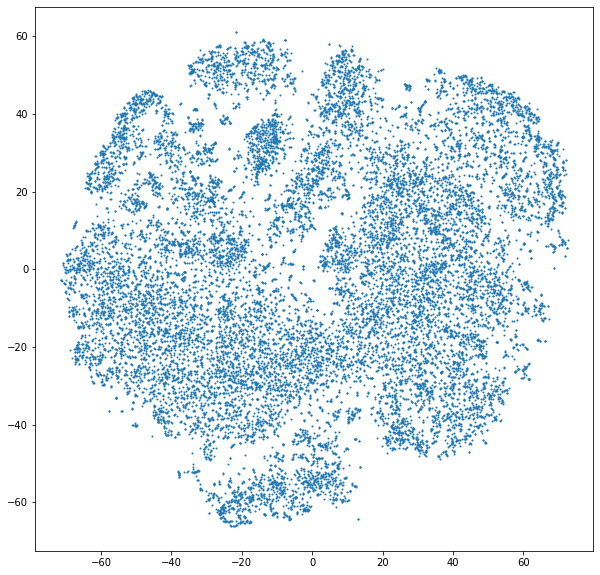

In [10]:
tsne_x, tsne_y = ana.run_tsne(seismic_infra, perplexity=30)
df['tsne_x'] = tsne_x
df['tsne_y'] = tsne_y

In [11]:
tsne_seis_infra = df[['time', 'tsne_x', 'tsne_y']]

In [12]:
tsne_seis_infra.to_hdf('tsne_seis_infra.h5', 'frame')

### 25x25 SOM

In [ ]:
from skopt.space import Real, Categorical, Integer

# Train som
size_x = 25
size_y = 25
niter = 59000 #10000
sigma = 2.2 # #0.3
learning_rate= .013 #.5
pca=False
random_seed = 2

# Skopt dimensions
skopt_dims = [       
    Real(        low=1e-2, high=1,     prior='log-uniform', name='learning_rate'     ),
    Real(        low=.1,    high=5,                         name='sigma'     ),
    Real(     low=1e2,    high=1e5,   prior='log-uniform', name='niter'       )
]

# Initial parameters
init_param = {'learning_rate':0.5, 'sigma':0.3, 'niter' : 10000}

search_result_full = ana.optimize(skopt_dims, init_param, seismic_infra, size_x, size_y,
                             num_calls=50, pca = pca, random_seed = random_seed)

learning_rate
sigma
niter

 	 ::: 1 SKOPT CALL ::: 

{'learning_rate': 0.5, 'sigma': 0.3, 'niter': 10000}
8.92337404169
0.960229015438
8.974889639992154

 	 ::: 2 SKOPT CALL ::: 

{'learning_rate': 0.25283406512697265, 'sigma': 2.7031217390347066, 'niter': 15762.855532960186}
10.0421188691
0.0315918617728
10.042168561922724

 	 ::: 3 SKOPT CALL ::: 

{'learning_rate': 0.13210793341416996, 'sigma': 2.0177142483784487, 'niter': 2891.728467923267}
10.3754858999
0.0522441468153
10.375617432747909

 	 ::: 4 SKOPT CALL ::: 

{'learning_rate': 0.017370954512295044, 'sigma': 2.350728174932811, 'niter': 175.71355267173476}
9.70051907146
0.988140271956
9.7507174840029

 	 ::: 5 SKOPT CALL ::: 

{'learning_rate': 0.24850648120305466, 'sigma': 3.1525105022968427, 'niter': 139.9208692878103}
11.301713684
0.816071976281
11.331138762958163

 	 ::: 6 SKOPT CALL ::: 

{'learning_rate': 0.08757644713600976, 'sigma': 2.1512951849045976, 'niter': 202.84979483817028}
9.91704749696
0.967692464983
9.96414872

/usr/local/lib/python3.7/site-packages/minisom.py:482: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


9.77916957575
0.98906042327
9.829058861971834

 	 ::: 21 SKOPT CALL ::: 

{'learning_rate': 0.01, 'sigma': 5.0, 'niter': 100000.0}
10.7014448807
0.0041918004294
10.70144570169052

 	 ::: 22 SKOPT CALL ::: 

{'learning_rate': 0.20182776931231008, 'sigma': 0.6073539443767284, 'niter': 100000.0}
